In [1]:
from os import getcwd, path

import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv, to_datetime
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.5)
%matplotlib inline

In [2]:
BASE_PATH = path.join(
    path.dirname(getcwd()), "src", "datasets", "final.csv"
)

df = read_csv(BASE_PATH)

In [3]:
df.head()

,Filing Date,Case Number,Case Type,Title,Plaintiff,Defendant,Address,Zip Code,Partial Cost
0,01/05/2015,24O15000001,Mortgage,Edward S Cohn vs Estate Of Sharon Stenhouse,Edward S Cohn,Estate Of Sharon Stenhouse,3456 Dolfield Ave,21215.0,"$57,793.24"
1,01/05/2015,24O15000002,Mortgage,James E Clarke vs Christopher Frankos,James E Clarke,Christopher Frankos,3015 Grindon Ave,21214.0,"$279,975.59"
2,01/05/2015,24O15000003,Mortgage,"C.Larry Hofmeister Jr vs FTIC LLC, et al",C.Larry Hofmeister Jr,"FTIC LLC, et al",2819 Pelham Ave,21213.0,NaN
3,01/05/2015,24O15000003,Mortgage,"C.Larry Hofmeister Jr vs FTIC LLC, et al",C.Larry Hofmeister Jr,"FTIC LLC, et al",3608 Beehler Ave,21215.0,NaN
4,01/05/2015,24O15000003,Mortgage,"C.Larry Hofmeister Jr vs FTIC LLC, et al",C.Larry Hofmeister Jr,"FTIC LLC, et al",3631 W Belvedere Ave,21215.0,NaN


In [4]:
df["Filing Date"] = to_datetime(df["Filing Date"])

In [5]:
new_df = DataFrame(df.groupby(df["Filing Date"].dt.week)['Case Number'].count())

In [6]:
new_df.describe()

,Case Number
count,52.000000
mean,67.596154
std,15.092213
min,35.000000
25%,57.000000
50%,67.000000
75%,77.750000
max,103.000000


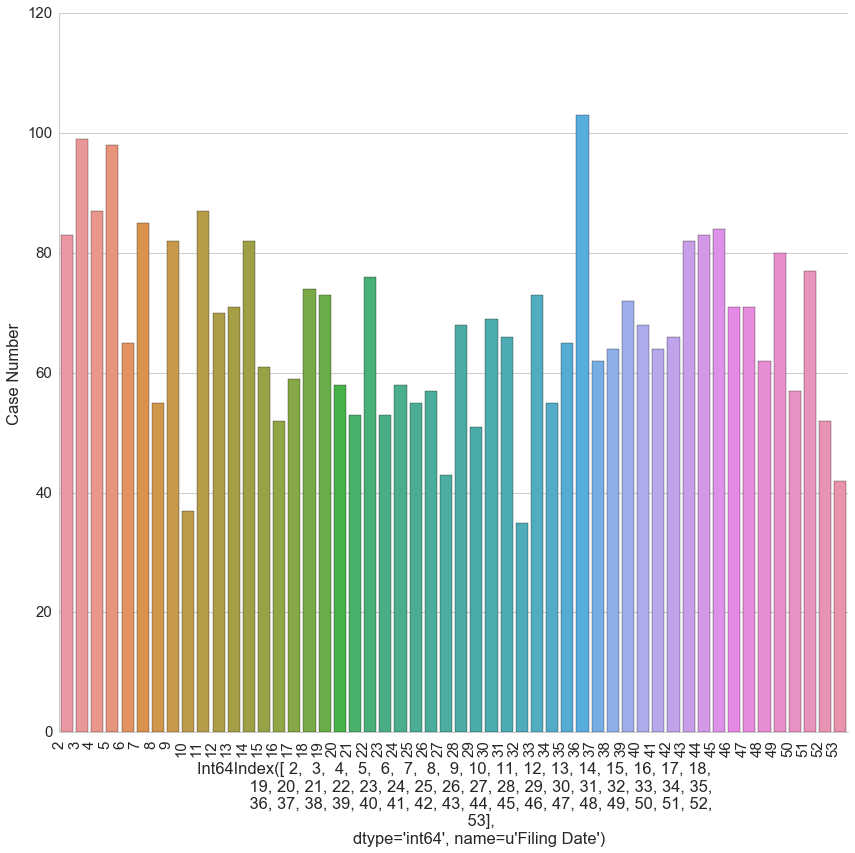

In [7]:
p = sns.factorplot(x=new_df.index, y='Case Number', kind='bar', data=new_df, size=12)
p.set_xticklabels(rotation=90, horizontalalignment='right')